# **NAME - ABHISHEK KUMAR**
# **REG NO. - 24MSD7017**
# **BATCH - M.Sc Data Science**

In [1]:
import keras
from keras import models, layers, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import callbacks
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128,128),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128,128),
    batch_size=32
)

Found 165 files belonging to 2 classes.
Using 132 files for training.
Found 165 files belonging to 2 classes.
Using 33 files for validation.


In [37]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128,128),
    batch_size=32
)

Found 165 files belonging to 2 classes.
Using 33 files for validation.


In [3]:

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))

In [4]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [54]:
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=2)
    return image, label

train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)

In [67]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4418 - loss: 40.2384 - val_accuracy: 0.7273 - val_loss: 11.3023
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5940 - loss: 20.8576 - val_accuracy: 0.7576 - val_loss: 2.8669
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7983 - loss: 2.1562 - val_accuracy: 0.6364 - val_loss: 4.6727
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8740 - loss: 1.1582 - val_accuracy: 0.6061 - val_loss: 3.1378
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9381 - loss: 0.3590 - val_accuracy: 0.6061 - val_loss: 2.1925
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9777 - loss: 0.0682 - val_accuracy: 0.6364 - val_loss: 1.6264
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9651 - loss: 0.0760 - val_accuracy: 0.6970 - val_loss: 1.3492
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9842 - loss: 0.0866 - val_accuracy: 0.7273 - val_loss: 1.2122
Epoch 

In [69]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.7857 - loss: 1.2688
Validation Accuracy: 0.7878788113594055


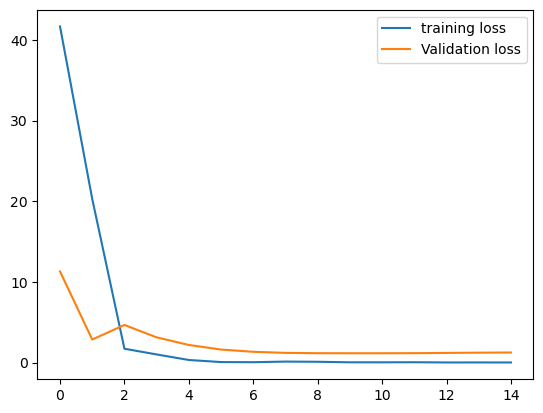

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
l = ['training loss', 'Validation loss']
plt.legend(l)

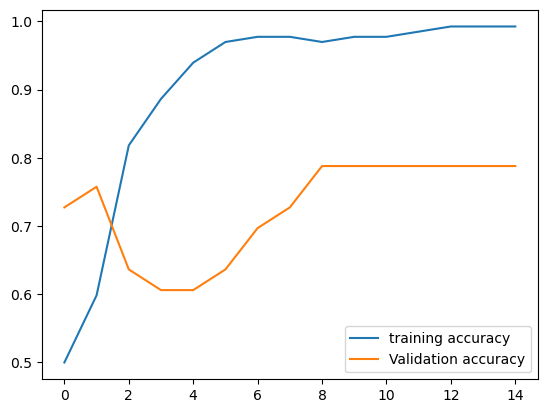

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
l = ['training accuracy', 'Validation accuracy']
plt.legend(l)

In [70]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.88      0.74      0.80        19

    accuracy                           0.79        33
   macro avg       0.79      0.80      0.79        33
weighted avg       0.80      0.79      0.79        33



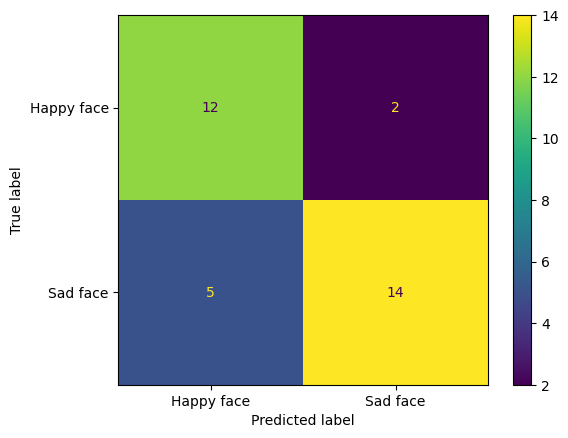

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
l = ['Happy face', 'Sad face']
cmd = ConfusionMatrixDisplay(cm, display_labels=l)
cmd.plot()

In [82]:
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Extract true labels from test_ds
y_true = np.concatenate([y for x, y in test_ds], axis=0)

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024F4D236160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step


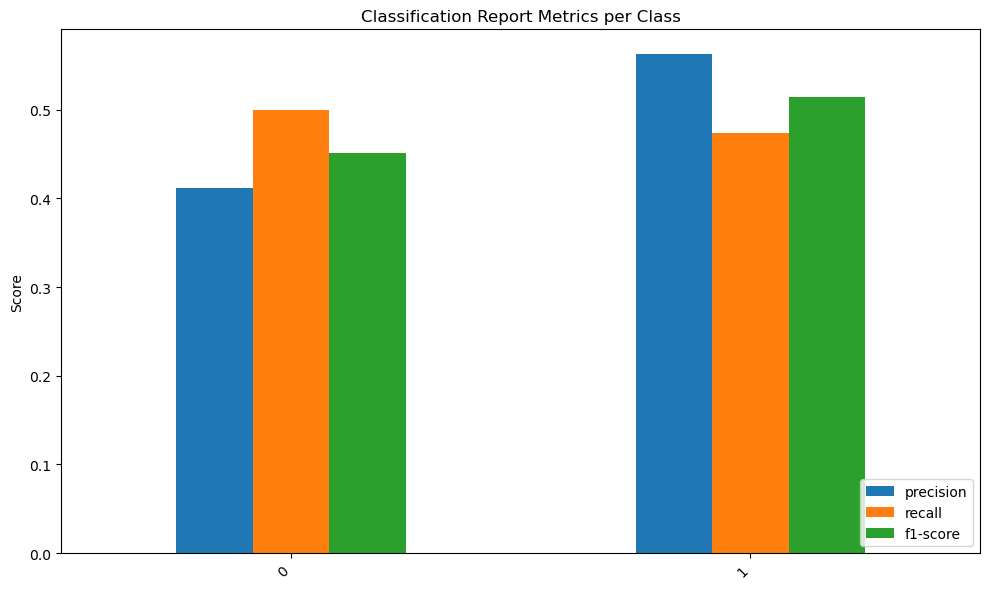

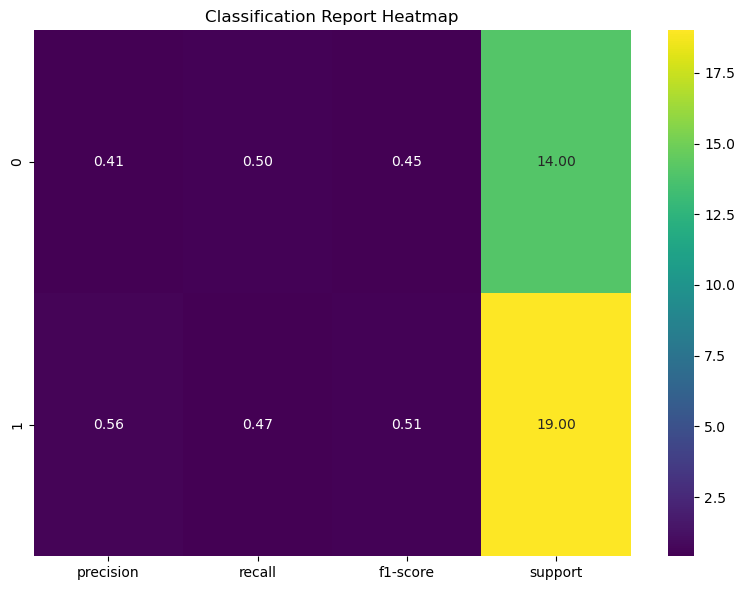

In [84]:
from sklearn.metrics import classification_report
import seaborn as sns
report_dict = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Drop aggregate rows
df_report = df_report.drop(labels=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Bar plot
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics per Class')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

# **Using the same Architecture as the VGG16 have**

In [74]:
cnn = Sequential([
    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 5
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
optimizer = cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
early = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [29]:
nn = cnn.fit(train_ds, validation_data=val_ds, epochs=15,callbacks=early)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.3992 - loss: 234.1323 - val_accuracy: 0.5758 - val_loss: 1.9252
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.4141 - loss: 1.7381 - val_accuracy: 0.5758 - val_loss: 1.1738
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.4289 - loss: 1.3095 - val_accuracy: 0.5758 - val_loss: 1.1367
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.3881 - loss: 0.9947 - val_accuracy: 0.4242 - val_loss: 0.7142
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.4508 - loss: 0.7337 - val_accuracy: 0.4242 - val_loss: 0.7522
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.5511 - loss: 0.7346 - val_accuracy: 0.4242 - val_loss: 0.7513
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.5936 - loss: 0.6733 - val_accuracy: 0.4242 - val_loss: 0.7378
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.4864 - loss: 0.7157 - val_accuracy: 0.5758 - val_loss: 0.6918
Epoch 

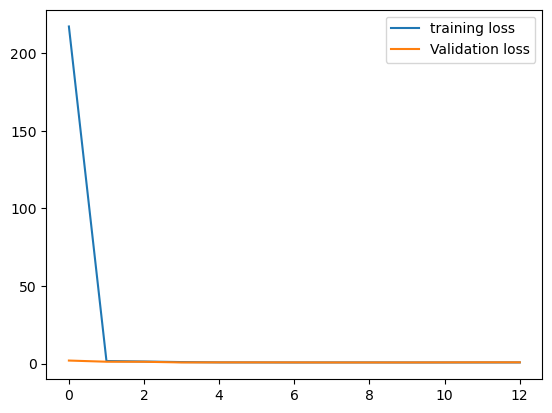

In [32]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
l = ['training loss', 'Validation loss']
plt.legend(l)

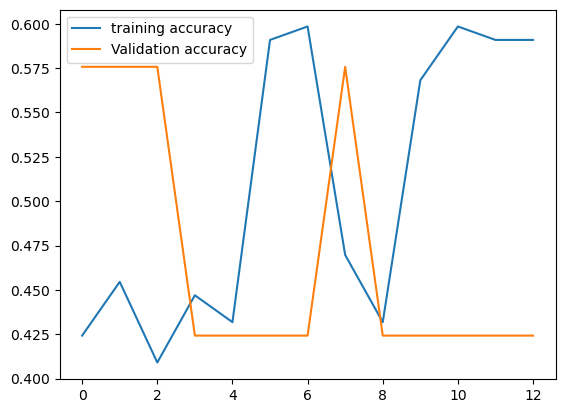

In [34]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
l = ['training accuracy', 'Validation accuracy']
plt.legend(l)

In [35]:
cnn.evaluate(val_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5713 - loss: 0.6922


[0.6917688250541687, 0.5757575631141663]

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions
y_pred = cnn.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)
# Per-class metrics
print(classification_report(y_true, y_pred_classes, target_names=test_ds.class_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step
[[ 0 14]
 [ 0 19]]
                   precision    recall  f1-score   support

happy_person_face       0.00      0.00      0.00        14
  sad_person_face       0.58      1.00      0.73        19

         accuracy                           0.58        33
        macro avg       0.29      0.50      0.37        33
     weighted avg       0.33      0.58      0.42        33



C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


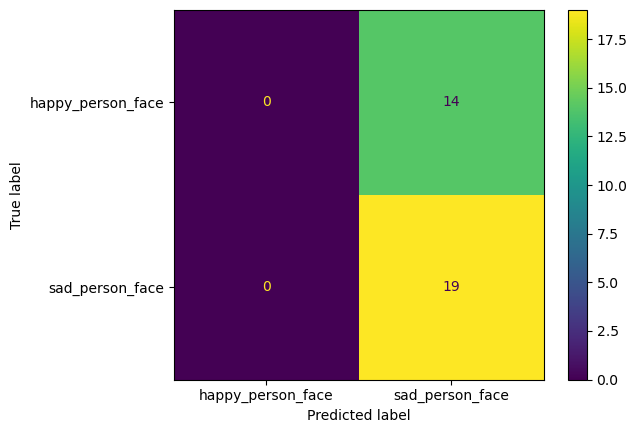

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm,display_labels=test_ds.class_names)
cmd.plot()

# **Using VGG19**

In [108]:
from keras.applications import VGG19

In [109]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 98s 1us/step


In [110]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6137 - loss: 20.6588 - val_accuracy: 0.5152 - val_loss: 12.9896
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7584 - loss: 7.5314 - val_accuracy: 0.5758 - val_loss: 14.3355
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8695 - loss: 4.1014 - val_accuracy: 0.6061 - val_loss: 10.9360
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9472 - loss: 0.8386 - val_accuracy: 0.5758 - val_loss: 8.9887
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9515 - loss: 0.3349 - val_accuracy: 0.6061 - val_loss: 7.6882
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9906 - loss: 0.0922 - val_accuracy: 0.6667 - val_loss: 7.1552
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9866 - loss: 0.1446 - val_accuracy: 0.6970 - val_loss: 7.0302
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9828 - loss: 0.0307 - val_accuracy: 0.6970 - val_loss: 6.9387
Epoc

# **Conclusion**

*As we saw the pre-trained Trained model perform-well on the data because as we know that approximately 1.2 million training images
is used in VGG16 model. so, it is giving the better accuracy as compare to the artitecture as we build on learning the architecture of VGG16*

*So, we can conclude that the VGG16 is better model to test the dataset*